In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

## create mortality data csv files

In [6]:
df_mortality = pd.read_csv('../data/wonder_mortality.txt', sep = '\t')

In [7]:
df_mortality.Race.value_counts()

White                               3146
Black or African American           2211
American Indian or Alaska Native    1345
Asian or Pacific Islander           1311
Name: Race, dtype: int64

In [8]:
df_mortality[df_mortality.Race == 'Black or African American'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/black_total_mortality.csv')

In [9]:
df_mortality[df_mortality.Race == 'White'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/white_total_mortality.csv')

In [10]:
df_mortality_infant = pd.read_csv('../data/mortality_infant.txt', sep = '\t')

In [11]:
df_mortality_infant[df_mortality_infant.Race == 'Black or African American'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/black_infant_mortality.csv')
df_mortality_infant[df_mortality_infant.Race == 'White'][['County', 'County Code', 'Deaths', 'Population']].reset_index(drop = True).to_csv('../data/white_infant_mortality.csv')

## loading data

In [12]:
df_black_total_mortality = pd.read_csv('../data/black_total_mortality.csv', index_col = 0)
df_white_total_mortality = pd.read_csv('../data/white_total_mortality.csv', index_col = 0)
df_black_infant_mortality = pd.read_csv('../data/black_infant_mortality.csv', index_col = 0)
df_white_infant_mortality = pd.read_csv('../data/white_infant_mortality.csv', index_col = 0)

In [18]:
for i in ['black', 'white']:
    for j in ['infant', 'total']:
        exec("df_" + i + "_" + j +"_mortality['County_Split'] = df_" + i + "_" + j +"_mortality.County.str.split(',').apply(lambda x: x[0])")
        exec("df_" + i + "_" + j +"_mortality['County_Name'] = df_" + i + "_" + j +"_mortality.County_Split.str.split().apply(lambda x: x[0])")
        exec("df_" + i + "_" + j +"_mortality['State'] = df_" + i + "_" + j +"_mortality.County.str.split(',').apply(lambda x: x[1])")
        eval("print('County number for " + i + " " + j + " csv: ', len(df_" + i + "_" + j +"_mortality.County.unique()))")
        

County number for black infant csv:  1033
County number for black total csv:  2211
County number for white infant csv:  2490
County number for white total csv:  3146


## the stats for black infant group is less than half of the counterpart... many counties don't record the black infant stat? but record the white infant stat? probably only going to study the counties that are in the black infant csv group

In [14]:
df_infant_stat_counties_white_no_black = np.setdiff1d(df_white_infant_mortality.County.unique(), df_black_infant_mortality.County.unique()) 

In [15]:
df_infant_stat_counties_black_no_white = np.setdiff1d(df_black_infant_mortality.County.unique(), df_white_infant_mortality.County.unique()) 

In [86]:
len(df_infant_stat_counties_black_no_white)

78

In [87]:
len(df_infant_stat_counties_white_no_black)

1535

In [82]:
df_black_total_mortality = df_black_total_mortality[df_black_total_mortality.County.isin(df_black_infant_mortality.County.values)].reset_index(drop = True)
df_white_total_mortality = df_white_total_mortality[df_white_total_mortality.County.isin(df_black_infant_mortality.County.values)].reset_index(drop = True)
df_white_infant_mortality = df_white_infant_mortality[df_white_infant_mortality.County.isin(df_black_infant_mortality.County.values)].reset_index(drop = True)

In [124]:
for i in ['black', 'white']:
    for j in ['infant', 'total']:
        exec("df_" + i + "_" + j +"_mortality['Death_Population_Ratio'] = df_" + i + "_" + j +"_mortality['Deaths']/ df_" + i + "_" + j +"_mortality['Population']")

In [126]:
df_black_total_mortality["Race"] = 'Black'
df_black_infant_mortality["Race"] = 'Black'
df_white_total_mortality["Race"] = 'White'
df_white_infant_mortality["Race"] = 'White'

In [129]:
df_total_mortality = pd.concat([df_black_total_mortality, df_white_total_mortality])
df_infant_mortality = pd.concat([df_black_infant_mortality, df_white_infant_mortality])

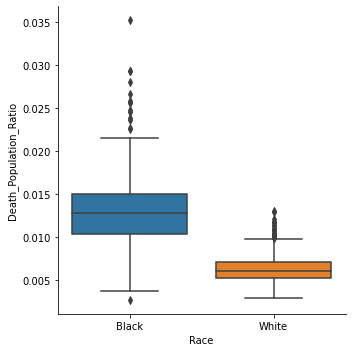

In [133]:
sns.catplot(data=df_infant_mortality, kind="box", x="Race", y="Death_Population_Ratio")

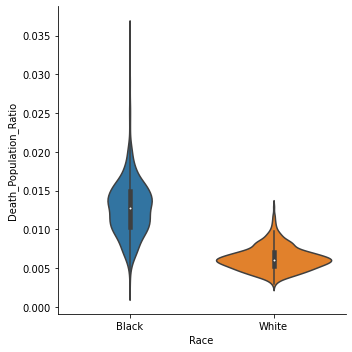

In [135]:
sns.catplot(data=df_infant_mortality, kind="violin", x="Race", y="Death_Population_Ratio")

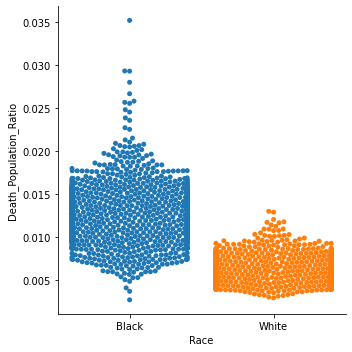

In [132]:
sns.catplot(data=df_infant_mortality, kind="swarm", x="Race", y="Death_Population_Ratio")

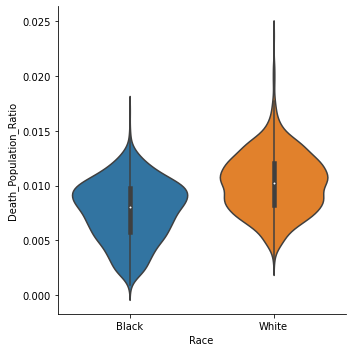

In [136]:
sns.catplot(data=df_total_mortality, kind="violin", x="Race", y="Death_Population_Ratio")

## Sundown town data loading

In [88]:
df_sundown = pd.read_csv('../data/sundown_states.csv')

In [150]:
len(df_sundown.city.unique())

2187

In [90]:
df_sundown.state = df_sundown.state.str.upper()

In [94]:
sundown_state_stat = df_sundown.state.value_counts()

In [100]:
df_sundown_state_stats = pd.DataFrame(sundown_state_stat).reset_index()

In [104]:
df_sundown_state_stats = df_sundown_state_stats.rename(columns = {"index": "State", "state":"# of Sundown Town"})

Text(0.5, 1.0, '# of Sundown Towns in Different State')

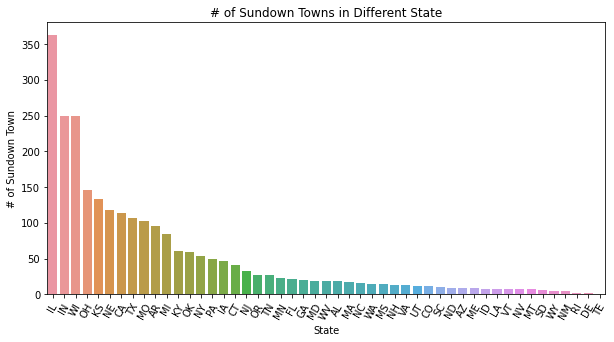

In [115]:
plt.figure(figsize=(10,5))
chart = sns.barplot(data = df_sundown_state_stats, x = 'State', y = '# of Sundown Town')
x = chart.set_xticklabels(chart.get_xticklabels(), rotation=60)
chart.set_title('# of Sundown Towns in Different State')

In [137]:
len(df_sundown.state.unique())

49

In [138]:
len(df_sundown.city.unique())

2187

In [20]:
df_sundown.city.unique()

array(['Anna', 'Glendale', 'Mize', ..., 'AAA', 'Garwood', 'Baker'],
      dtype=object)

In [144]:
len(np.intersect1d(df_sundown.city.unique(), df_black_infant_mortality.County_Name.unique()))

161

In [145]:
len(np.intersect1d(df_sundown.city.unique(), df_black_infant_mortality.County_Split.unique()))

71

In [159]:
df_temp = df_black_infant_mortality[df_black_infant_mortality.County_Split.isin(np.intersect1d(df_sundown.city.unique(), df_black_infant_mortality.County_Split.unique()))]
df_temp2 = df_black_infant_mortality[~df_black_infant_mortality.County_Split.isin(np.intersect1d(df_sundown.city.unique(), df_black_infant_mortality.County_Split.unique()))]

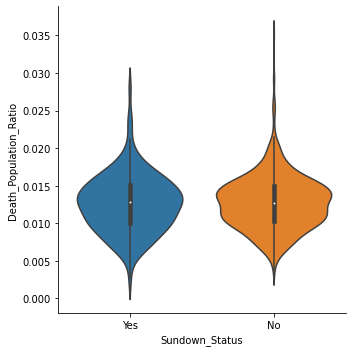

In [161]:
df_temp['Sundown_Status'] = 'Yes'
df_temp2['Sundown_Status'] = 'No'
df_sundown_mortality_black_infant = pd.concat([df_temp, df_temp2])

sns.catplot(data=df_sundown_mortality_black_infant, kind="violin", x="Sundown_Status", y="Death_Population_Ratio")

In [162]:
df_sundown_mortality_black_infant.Sundown_Status.value_counts()

No     875
Yes    158
Name: Sundown_Status, dtype: int64

## only 71 counties has overlap with black infant mortality data -> mainly because sundown towns many are city names

In [147]:
df_zipcode = pd.read_csv('../data/zip_code_database.csv')

In [148]:
df_zipcode.primary_city.values

array(['Holtsville', 'Holtsville', 'Adjuntas', ..., 'Ward Cove',
       'Wrangell', 'Ketchikan'], dtype=object)

In [149]:
len(np.intersect1d(df_sundown.city.unique(), df_zipcode.primary_city.unique()))

1744

In [40]:
df_zipcode.county.unique()

array(['Suffolk County', 'Adjuntas Municipio', 'Aguada Municipio', ...,
       'Wrangell City and Borough', 'Prince of Wales-Hyder Census Area',
       'Prince of Wales-Outer Ketchikan Borough'], dtype=object)

In [44]:
df_temp = pd.read_csv('../data/black_mortality.csv')
df_temp['County'] = df_temp.Notes.str.split(',').apply(lambda x: str(x[0]))
df_zipcode.county = df_zipcode.county.apply(lambda x: str(x))
len(np.intersect1d(df_temp.County.unique(), df_zipcode.county.unique()))

1431